In [2]:
"""
How do we know how many clusters?
Use AIC/BIC
Bayesian information criterion (BIC) can be helpful to pick the right number of parameters.
BIC estimates the quality of a model using penalty terms for # parameters.
If we fit data with 100 gaussians we will be overfitting. 
BIC provides optimal vale if we do not know.
Looks asymptotic, pick the one at the elbow. 

"""
import numpy as np
import cv2

GaussianMixture(covariance_type='tied', n_components=2)
-4995746.823182086


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

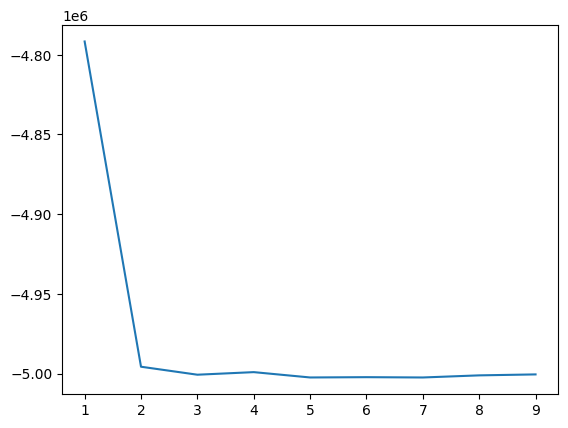

In [7]:

img = cv2.imread("../images/Alloy.jpg")

img2 = img.reshape((-1,3))

from sklearn.mixture import GaussianMixture as GMM

#####################
#This part calculate BIC

n = 2
gmm_model = GMM(n, covariance_type='tied').fit(img2)

print(gmm_model)

bic_values = gmm_model.bic(img2)
print(bic_values)



n_components = np.arange(1,10)

gmm_models = [GMM(n, covariance_type='tied').fit(img2) for n in n_components]

#print(gmm_models)


#print(GMM.bic(img2))

from matplotlib import pyplot as plt
plt.plot(n_components, [m.bic(img2) for m in gmm_models], label='BIC')
plt.xlable('n_components')



Nhìn biểu đồ, ta thấy khi số component >= 2 thì giá trị BIC giảm nhanh chóng, và cùng với việc tránh overfitting(nếu chia số lượng component quá lớn, đơn giản để hiểu thì nó như phép vi phân - sai phân, khi sai số của sai phân trở lên nhỏ tiến về 0 thì sẽ trở thành vi phân, đây cũng chính là nguyên lý của việc sử dụng phép tích phân để tính toán cũng như việc bất đẳng thức đối với các biến rời rạc cũng có thể sử dụng tạo ra biến thể tích phân)
=> Ta chọn giá trị giảm xuống đột ngột đầu tiên là n_components = 2